In [2]:
# Nạp các gói thư viện NumPy và Pandas
import pandas as pd
import numpy as np
import regex
import string
import os
os.chdir(path)

In [3]:
data = pd.read_csv('data/sentiments_vector.csv')
data

bctc  biên_bản  biến_động  bks  bán  bán_niên  báo_cáo  bất_thường  bị  \
0         0         0          0    0    0         0        0           0   0   
1         0         0          0    0    0         0        0           0   0   
2         0         0          0    0    0         0        0           0   0   
3         0         0          0    0    0         0        0           0   0   
4         0         0          0    0    0         0        0           0   0   
...     ...       ...        ...  ...  ...       ...      ...         ...  ..   
28260     0         0          0    0    1         0        0           0   0   
28261     0         0          0    0    0         0        0           0   0   
28262     0         0          0    0    0         0        0           0   0   
28263     0         0          0    0    0         0        0           0   0   
28264     0         0          0    0    0         0        1           0   0   

       bổ_nhiệm  ...  V11  VNI  VST  \
0             0  ...    0    0    0   
1             0  ...    0    0    0   
2             0  ...    0    0    0   
3             0  ...    0    0    0   
4             0  ...    0    0    0   
...         ...  ...  ...  ...  ...   
28260         0  ...    0    0    0   
28261         1  ...    0    0    0   
28262         0  ...    0    0    0   
28263         0  ...    0    0    0   
28264         0  ...    0    0    0   

                                                   title    return  \
0      yêu_cầu giải_trình việc cổ_phiếu giảm phiên ti... -0.105035   
1           giải_trình việc giá giảm sàn phiên liên_tiếp -0.105361   
2                              niêm_yết bổ_sung cổ_phiếu  0.048278   
3      giao_dịch cổ_phiếu người có liên_quan giám_đốc... -0.035718   
4      lấy ý_kiến cổ_đông văn_bản thông_qua phương_án...  0.002736   
...                                                  ...       ...   
28260           vũ_đình phúc ủy_viên hđqt đăng_ký bán cp -0.064539   
28261  bổ_nhiệm đặng ngọc_dung giữ chức kế_toán_trưởn...  0.042622   
28262                              tạm_ứng cổ_tức đợt cp  0.063736   
28263  nghị_quyết v thực_hiện giao_dịch đối_tượng có ... -0.057923   
28264  báo_cáo thay_đổi sở_hữu nhóm nhà_đầu_tư nước_n...  0.010811   

       volatility  ma_ck        Date                session  sum  
0        0.027367    PVE  2008-01-08  return_before_session    4  
1        0.043273    PVE  2008-01-11  return_before_session    4  
2        0.019120    PET  2008-01-17  return_before_session    4  
3        0.042327    VC5  2008-01-17  return_before_session    6  
4        0.042704    DCS  2008-01-25  return_before_session   10  
...           ...    ...         ...                    ...  ...  
28260    0.058086    TOP  2023-01-06      return_in_session    6  
28261    0.026151    HAS  2023-01-09  return_before_session    7  
28262    0.020038    PAC  2023-01-09  return_before_session    4  
28263    0.026153    PIT  2023-01-09  return_before_session    5  
28264    0.083755    PVD  2023-01-09  return_before_session    4  

[28265 rows x 344 columns]

# EDA

In [ ]:
data['Date'] = pd.DatetimeIndex(data['Date'])

In [6]:
sentiments = data.columns.tolist()
for i in ['title', 'return', 'volatility', 'ma_ck', 'Date', 'sum', 'session']:
  print(i)
  sentiments.remove(i)
sentiments

title
return
volatility
ma_ck
Date
sum
session


['bctc',
 'biên_bản',
 'biến_động',
 'bks',
 'bán',
 'bán_niên',
 'báo_cáo',
 'bất_thường',
 'bị',
 'bổ_nhiệm',
 'bổ_sung',
 'cbtt',
 'chào',
 'chênh_lệch',
 'chấp_thuận',
 'chậm',
 'chốt',
 'chủ_tịch',
 'chức',
 'chứng_khoán',
 'chứng_nhận',
 'cp',
 'ctcp',
 'cthđqt',
 'có',
 'công_bố',
 'công_ty',
 'cùng',
 'cảnh_báo',
 'cổ_phiếu',
 'cổ_phần',
 'cổ_tức',
 'cổ_đông',
 'danh_sách',
 'diện',
 'doanh_nghiệp',
 'gia_hạn',
 'giao_dịch',
 'giá',
 'giải_trình',
 'giảm',
 'giấy',
 'giữ',
 'gần',
 'hn',
 'hđqt',
 'hơn',
 'họp',
 'hợp_nhất',
 'hợp_đồng',
 'kinh_doanh',
 'kiểm_soát',
 'kiểm_toán',
 'kqkd',
 'ký',
 'kế_hoạch',
 'kết_quả',
 'kỳ',
 'liên_quan',
 'lnst',
 'là',
 'làm',
 'lãi',
 'lên',
 'lấy',
 'lỗ',
 'lớn',
 'lợi_nhuận',
 'mua',
 'mẹ',
 'nam',
 'nghị_quyết',
 'người',
 'nhận',
 'nhắc_nhở',
 'niêm_yết',
 'nộp',
 'phát_hành',
 'phương_án',
 'phạm',
 'quyết_định',
 'quyền',
 'quản_trị',
 'quỹ',
 'ra',
 'sau',
 'so',
 'soát_xét',
 'tgđ',
 'tham_dự',
 'thay_đổi',
 'thu',
 'thuế',
 'thành

In [44]:
data[sentiments].sum().sort_values().tail(20)

tgđ           1518
giao_dịch     1564
họp           1587
so            1614
cổ_tức        2058
bctc          2146
quyền         2168
đhđcđ         2248
báo_cáo       2543
cổ_đông       2675
công_ty       2852
giải_trình    3128
hđqt          3534
nghị_quyết    3917
mua           4317
đăng_ký       5063
bán           6561
cổ_phiếu      6872
deep          7400
cp            8596
dtype: int64

In [48]:
data[data['giải_trình']==1]

bctc  biên_bản  biến_động  bks  bán  bán_niên  báo_cáo  bất_thường  bị  \
0         0         0          0    0    0         0        0           0   0   
1         0         0          0    0    0         0        0           0   0   
16        0         0          1    0    0         0        0           0   0   
43        0         0          1    0    0         0        0           0   0   
48        0         0          1    0    0         0        0           0   0   
...     ...       ...        ...  ...  ...       ...      ...         ...  ..   
28124     0         0          0    0    0         0        0           0   0   
28131     0         0          0    0    0         0        0           0   0   
28137     0         0          0    0    0         0        0           0   0   
28189     0         0          0    0    0         0        0           0   0   
28217     0         0          0    0    0         0        0           0   0   

       bổ_nhiệm  ...  V11  VNI  VST  \
0             0  ...    0    0    0   
1             0  ...    0    0    0   
16            0  ...    0    0    0   
43            0  ...    0    0    0   
48            0  ...    0    0    0   
...         ...  ...  ...  ...  ...   
28124         0  ...    0    0    0   
28131         0  ...    0    0    0   
28137         0  ...    0    0    0   
28189         0  ...    0    0    0   
28217         0  ...    0    0    0   

                                                   title    return  \
0      yêu_cầu giải_trình việc cổ_phiếu giảm phiên ti... -0.105035   
1           giải_trình việc giá giảm sàn phiên liên_tiếp -0.105361   
16     giải_trình biến_động kết_quả kinh_doanh mua lạ... -0.050745   
43     giải_trình biến_động giá pm thông_tin bổ_sung ...  0.044784   
48     thông_báo trả cổ_tức đợt pm tb việc họp đhcđ p...  0.046855   
...                                                  ...       ...   
28124      giải_trình cổ_phiếu tăng trần phiên liên_tiếp  0.023530   
28131  ban_hành quy_chế hoạt_động ban kiểm_soát giải_...  0.002301   
28137    cbtt v miễn_nhiệm_chức_danh tgđ giải_trình kqkd -0.068581   
28189      giải_trình cổ_phiếu tăng trần phiên liên_tiếp  0.001098   
28217   giải_trình thông_tin tình_hình tài_chính công_ty  0.005249   

       volatility  ma_ck       Date                session  sum  
0        0.027367    PVE 2008-01-08  return_before_session    4  
1        0.043273    PVE 2008-01-11  return_before_session    4  
16       0.026061    PIT 2008-02-22  return_before_session    8  
43       0.030418    CYC 2008-03-07  return_before_session    9  
48       0.330705    NSC 2008-03-07  return_before_session   11  
...           ...    ...        ...                    ...  ...  
28124    0.030999    VOS 2022-12-02      return_in_session    4  
28131    0.044557    TGG 2022-12-05      return_in_session    6  
28137    0.022324    TNI 2022-12-06      return_in_session    4  
28189    0.032544    OGC 2022-12-19      return_in_session    5  
28217    0.019120    PET 2022-12-26  return_before_session    6  

[2719 rows x 344 columns]

<ipython-input-70-f4471777f4a4>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  text = " ".join(title for title in data[data['deep']>0][data['return']>0]['title'])


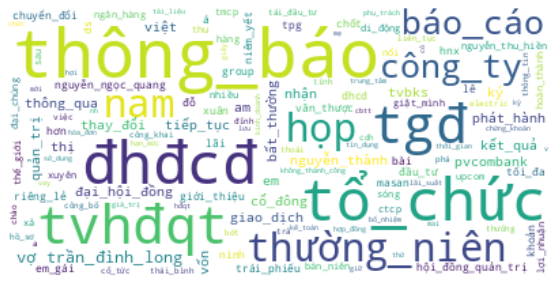

In [70]:
text = " ".join(title for title in data[data['deep']>0][data['return']>0]['title'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords = ['bán', 'mua', 'cp', 'đăng_ký', 'nghị_quyết', 'cổ_phiếu'], max_font_size=50, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<ipython-input-73-dd678902d925>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  text = " ".join(title for title in data[data['deep']>0][data['return']<0]['title'])


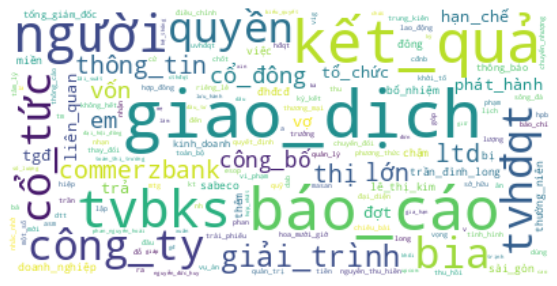

In [73]:
text = " ".join(title for title in data[data['deep']>0][data['return']<0]['title'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords = ['bán', 'mua', 'cp', 'đăng_ký', 'nghị_quyết', 'cổ_phiếu', 'có', 'ctcp'], max_font_size=50, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [74]:
data[data['deep']>0].sum()

<ipython-input-74-7c20ccb009d5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data['deep']>0].sum()


bctc                                                          0
biên_bản                                                      0
biến_động                                                     0
bks                                                           0
bán                                                          28
                                    ...                        
return                                               -23.537433
volatility                                            87.272665
ma_ck         TDHTDHHASS96PNJLM3LM3LM3LM3FBABT6PCTMSNMSNMSNM...
session       return_before_sessionreturn_before_sessionretu...
sum                                                        7969
Length: 343, dtype: object

# Compressed Factorization

In [ ]:
X = data[sentiments]
y = data['return']

In [ ]:
# from sklearn.decomposition import NMF
# compress = NMF(n_components=100, init='random', random_state=42)
# W = compress.fit_transform(X)
# W

In [ ]:
# pd.DataFrame(data=W)

In [ ]:
# H = compress.components_
# H

In [ ]:
# pd.DataFrame(compress.inverse_transform(W))

In [ ]:
# X

# MODELLING

In [ ]:
# Scaling X
# from sklearn.preprocessing import StandardScaler
# sentiments_scaled = pd.DataFrame(data = StandardScaler().fit_transform(W))
sentiments_scaled = X

In [ ]:
# Split train and test sample
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(sentiments_scaled, y, test_size=0.2, random_state=42)
X_train = X
X_test = X
y_train = y
y_test = y

In [ ]:
X

bctc  biên_bản  biến_động  bks  bán  bán_niên  báo_cáo  bất_thường  bị  \
0         0         0          0    0    0         0        0           0   0   
1         0         0          0    0    0         0        0           0   0   
2         0         0          0    0    0         0        0           0   0   
3         0         0          0    0    0         0        0           0   0   
4         0         0          0    0    0         0        0           0   0   
...     ...       ...        ...  ...  ...       ...      ...         ...  ..   
28260     0         0          0    0    1         0        0           0   0   
28261     0         0          0    0    0         0        0           0   0   
28262     0         0          0    0    0         0        0           0   0   
28263     0         0          0    0    0         0        0           0   0   
28264     0         0          0    0    0         0        1           0   0   

       bổ_nhiệm  ...  S12  S96  SAB  SCO  SD5  SPP  TOP  V11  VNI  VST  
0             0  ...    0    0    0    0    0    0    0    0    0    0  
1             0  ...    0    0    0    0    0    0    0    0    0    0  
2             0  ...    0    0    0    0    0    0    0    0    0    0  
3             0  ...    0    0    0    0    0    0    0    0    0    0  
4             0  ...    0    0    0    0    0    0    0    0    0    0  
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
28260         0  ...    0    0    0    0    0    0    1    0    0    0  
28261         1  ...    0    0    0    0    0    0    0    0    0    0  
28262         0  ...    0    0    0    0    0    0    0    0    0    0  
28263         0  ...    0    0    0    0    0    0    0    0    0    0  
28264         0  ...    0    0    0    0    0    0    0    0    0    0  

[28265 rows x 337 columns]

In [ ]:
# data['date'] = pd.DatetimeIndex(data['Date'])
# train_index = data[data['date']<'2022-06-01'].index
# test_index = data[data['date']>='2022-06-01'].index

# X_train = sentiments_scaled[sentiments_scaled.index.isin(train_index)]
# X_test = sentiments_scaled[sentiments_scaled.index.isin(test_index)]

# y = y[y.index.isin(sentiments_scaled.index)]
# y_train = y[y.index.isin(train_index)]
# y_test = y[y.index.isin(test_index)]

In [ ]:
y_train.shape

(28265,)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Random Forest
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=52)
model.fit(X_train, y_train.values)

#Predict y value for test dataset
y_pred = model.predict(X_test)
# y_prob = model.predict_proba(X_test)[:,1]
 

# print(classification_report(y_test,y_pred))
# print('Confusion Matrix:',confusion_matrix(y_test, y_pred))

# fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)
# print('AUC:', roc_auc)  

In [ ]:
from sklearn.metrics import r2_score
print('Chỉ R2 trong tập train là: ', r2_score(y_test, y_pred))

Chỉ R2 trong tập train là:  0.7480735788384469


In [ ]:
import pickle
filename = 'Preprocessing/20230205/finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
r2_score(y_train, model.predict(X_train))

0.7480735788384469

In [ ]:
result = data[['Date', 'ma_ck', 'title']]
result['pred_return'] = model.predict(data[sentiments])
result = result.rename(columns={'title':'title_new'})

<ipython-input-22-6509d109bf20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['pred_return'] = model.predict(data[sentiments])


In [ ]:
from tabulate import tabulate
title=pd.read_csv('data/NLP.csv')
result = result.merge(title[['title', 'title_new']], on='title_new', how='left')


    title                                                      pred_return
--  -------------------------------------------------------  -------------
 0  Yêu cầu giải trình việc cổ phiếu giảm 5 phiên tiên tiếp     -0.0760872
 1  PVE: Giải trình về việc giá giảm sàn 5 phiên liên tiếp      -0.0759578
 2  AMD: 05/04/2017, niêm yết bổ sung 2.478.458 cổ phiếu         0.0381063
 3  AMD: 9.6.2016, niêm yết bổ sung 32.399.936 cổ phiếu          0.0381063
 4  MCG: Niêm yết bổ sung 3,6 triệu cổ phiếu                     0.0381063
